In [ ]:
import pandas as pd # this is python library used for data manipulation and analysis
import numpy as np # the numpy is python library use for handle data structure and large n_diminsions
import matplotlib.pyplot as plt # the matplotlib is python library use for data visualization
import seaborn as sns # seaborn is a python library use for visulization of data

from sklearn.preprocessing import LabelEncoder # sklearn library use for Encoding
from sklearn.impute import KNNImputer # sklearn library use for missing value



# Load data

In [ ]:
df=pd.read_csv("/content/spam (1).csv",encoding="ISO-8859-1") # i just download this dataset from kaggle

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 5572 entries, 0 to 5571

Data columns (total 5 columns):

 #   Column      Non-Null Count  Dtype 

---  ------      --------------  ----- 

 0   v1          5572 non-null   object

 1   v2          5572 non-null   object

 2   Unnamed: 2  50 non-null     object

 3   Unnamed: 3  12 non-null     object

 4   Unnamed: 4  6 non-null      object

dtypes: object(5)

memory usage: 217.8+ KB


In [ ]:
df.shape

(5572, 5)

## 1_ Feature Engineering


In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
#change the our X,Y feature name
df.rename(columns={"v1":"target","v2":"text"},inplace=True)

In [ ]:
df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
# first of all we remove last 3 features
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [ ]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#check NUL values
df.isnull().sum()

,0
target,0
text,0


In [ ]:
df.isnull().sum()/df.shape[0]*100

,0
target,0.0
text,0.0


In [ ]:
df.duplicated().sum()

403

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(5169, 2)

In [ ]:
df.duplicated().sum()

0

# Encoding

In [ ]:
# we apply just label encoder on our target column
lb_imputr=LabelEncoder()
df["target"]=lb_imputr.fit_transform(df["target"])

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# EDA

In [ ]:
df['target'].value_counts()# our data is unbalanced

,count
target,
0,4516
1,653


<Axes: xlabel='target'>

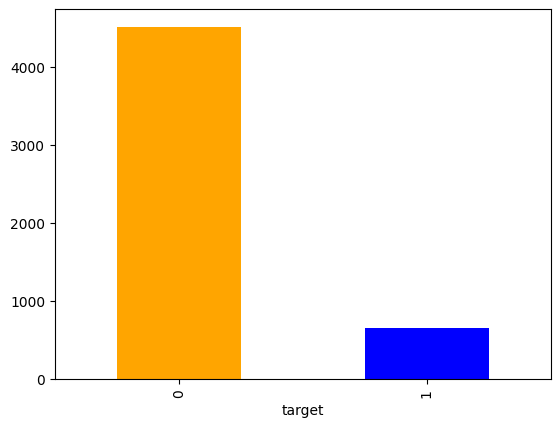

In [ ]:
df['target'].value_counts().plot(kind='bar',color=['orange','blue'])

<Axes: ylabel='count'>

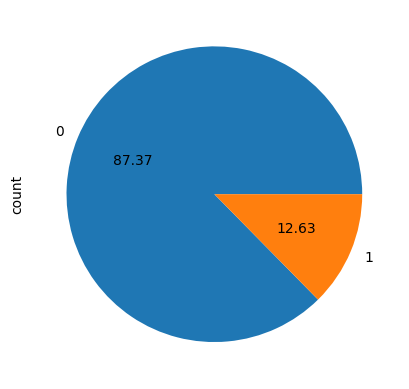

In [ ]:
from enum import auto
df['target'].value_counts().plot(kind='pie',autopct='%.2f')

In [ ]:
import nltk # NLP libarary for text data transformation
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...

[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# a deep analyze on our text column
df['text'][5]

"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"

In [ ]:
df['text'].apply(len)

,text
0,111
1,29
2,155
3,49
4,61
...,...
5567,161
5568,37
5569,57
5570,125


In [ ]:
df['num_char']=df['text'].apply(len) #num of chracter in our text column

In [ ]:
df['num_word']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))# num of words in text column

In [ ]:
df['num_sent']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x))) # num of sentence in text column

In [ ]:
df.head()

,target,text,num_char,num_word,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df[['num_char','num_word','num_sent']].describe()

,num_char,num_word,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df['target'] == 1 ][['num_char','num_word','num_sent']].describe() # for spam

,num_char,num_word,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:
df[df['target'] == 0 ][['num_char','num_word','num_sent']].describe() # for ham

,num_char,num_word,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


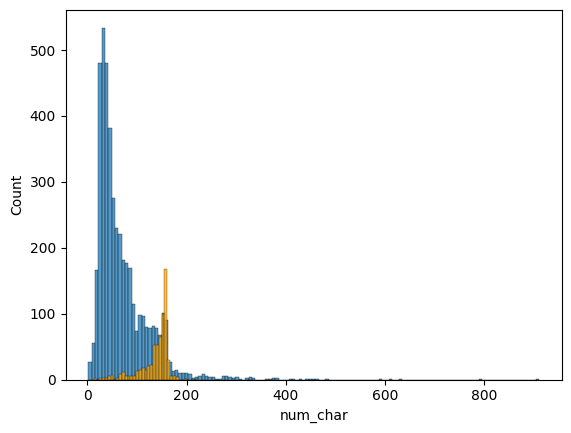

In [ ]:
sns.histplot(df[df['target'] == 0]['num_char'])
sns.histplot(df[df['target'] == 1]['num_char'],color='orange') # hitograme plot of spam and ham blue show ham and orange show spam data
plt.show()

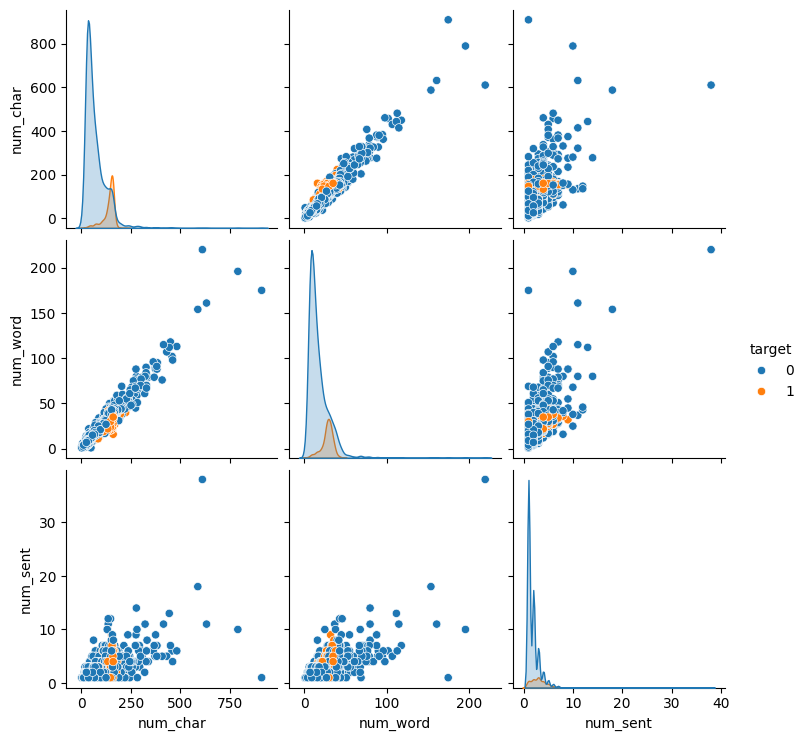

In [ ]:
sns.pairplot(df,hue='target') # in which pair plot we see the distribution of data with the compar of each column

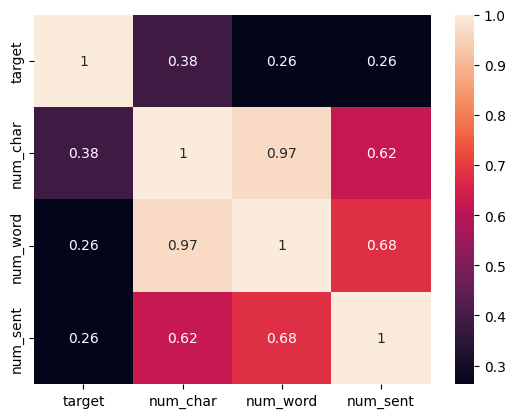

In [ ]:
sns.heatmap(df.drop(columns=['text']).corr(),annot=True) # in which heatmap that is define how tendance increas
plt.show()

# Text preprocessing
we follow these steps
1 lower case

2 remove Tags

3 remove URLs

4 Remove punctuations

5 chat word treatment

6 spelling corection

7 remove stopwords

8 handling emjoy

9 Tokenization

10 stemming

11 lemmitization

In [ ]:
from nltk.corpus import stopwords # this library use for stop english specific word like(he.is am are,we,you do,)
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...

[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk

<module 'nltk' from '/usr/local/lib/python3.10/dist-packages/nltk/__init__.py'>

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from nltk.stem.porter import PorterStemmer# this nlp library use for steaming
ps=PorterStemmer()

In [ ]:
ps.stem("loving")

'love'

In [ ]:
def text_pr(text): #that our function transform our text columns into capable form
  text=text.lower()
  text=nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  text=y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text=y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)


In [ ]:
text_pr("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [ ]:
# So our function is working well ans now we apply this on our text column
df['text'].apply(text_pr)

,text
0,go jurong point crazi avail bugi n great world...
1,ok lar joke wif u oni
2,free entri 2 wkli comp win fa cup final tkt 21...
3,u dun say earli hor u c alreadi say
4,nah think goe usf live around though
...,...
5567,2nd time tri 2 contact u pound prize 2 claim e...
5568,b go esplanad fr home
5569,piti mood suggest
5570,guy bitch act like interest buy someth els nex...


In [ ]:
df['text']=df['text'].apply(text_pr)

In [ ]:
df.head()

,target,text,num_char,num_word,num_sent
0,0,go jurong point crazi avail bugi n great world...,111,24,2
1,0,ok lar joke wif u oni,29,8,2
2,1,free entri 2 wkli comp win fa cup final tkt 21...,155,37,2
3,0,u dun say earli hor u c alreadi say,49,13,1
4,0,nah think goe usf live around though,61,15,1


# Lets create a would_Cloud

In [ ]:
from wordcloud import WordCloud # the wordcloud is used for show most common words which is used in text data
wc=WordCloud(width=600,height=600,min_font_size=10,background_color='white')

In [ ]:
spam_wc=wc.generate(df[df['target']==1]['text'].str.cat(sep=" "))

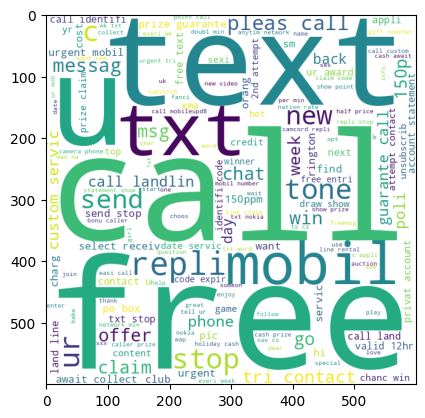

In [ ]:
plt.imshow(spam_wc) # for spam most common word

In [ ]:
ham_wc=wc.generate(df[df['target']==0]['text'].str.cat(sep=" "))

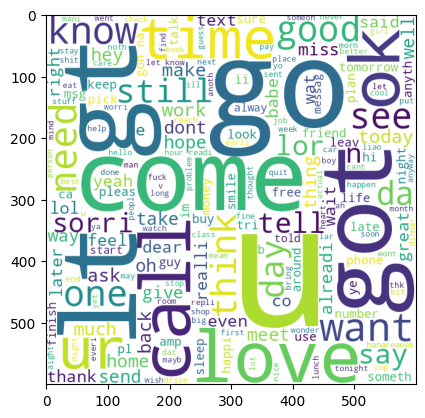

In [ ]:
plt.imshow(ham_wc) # for ham most common word

In [ ]:
df.head()

,target,text,num_char,num_word,num_sent
0,0,go jurong point crazi avail bugi n great world...,111,24,2
1,0,ok lar joke wif u oni,29,8,2
2,1,free entri 2 wkli comp win fa cup final tkt 21...,155,37,2
3,0,u dun say earli hor u c alreadi say,49,13,1
4,0,nah think goe usf live around though,61,15,1


# Feature extraction

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer # for feature extraction this method
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=2500)

In [ ]:
X=tfidf.fit_transform(df['text']).toarray()

In [ ]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y=df['target'].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

#Split Data into train/test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1) # 30% test and 70% traning

In [ ]:
print(X_train.shape)


(3618, 2500)


In [ ]:
print(X_test.shape)

(1551, 2500)


# Model building

In [ ]:
#lets import some ML algorithms
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB # navies models

from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier #ensemble models

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.model_selection import GridSearchCV # grid_cv use for select best paarameters and for improve performance of model

from sklearn.model_selection import cross_val_score # the cross_val_score used for validation
from sklearn.metrics import precision_score

# Navies Algorithms

In [ ]:
# lets create objects for navies models
gu_nb=GaussianNB()
mu_nb=MultinomialNB()
be_nb=BernoulliNB()

In [ ]:
gu_nb.fit(X_train,y_train) # train our model

GaussianNB()

In [ ]:
y_predgu=gu_nb.predict(X_test) # prediction on test data

In [ ]:
mu_nb.fit(X_train,y_train)

MultinomialNB()

In [ ]:
y_predmu=mu_nb.predict(X_test)

In [ ]:
be_nb.fit(X_train,y_train)

BernoulliNB()

In [ ]:
y_predbe=be_nb.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_predgu),'Gaussion_score')
print(precision_score(y_test,y_predgu),'Gaussion_precision')

print(accuracy_score(y_test,y_predmu),'Multi_nomail_score')
print(precision_score(y_test,y_predmu),'Multi_nomail_precision')

print(accuracy_score(y_test,y_predbe),'Bernoulli_score')
print(precision_score(y_test,y_predbe),'Bernoulli_precision')

0.8652482269503546 Gaussion_score

0.5 Gaussion_precision

0.9658284977433914 Multi_nomail_score

1.0 Multi_nomail_precision

0.9748549323017408 Bernoulli_score

0.9829545454545454 Bernoulli_precision


In [ ]:
report=classification_report(y_test,y_predgu) # classification report of Gaussion navies baiyes that is not bad
print(report)

              precision    recall  f1-score   support



           0       0.97      0.87      0.92      1342

           1       0.50      0.83      0.62       209



    accuracy                           0.87      1551

   macro avg       0.74      0.85      0.77      1551

weighted avg       0.91      0.87      0.88      1551




In [ ]:
#confusion_matrix for gaussion_nb
confusion_matrix(y_test,y_predgu) # our gaussion_model predict 1169 value for ham and 173 values for spam corect
                                  # and incorect values for ham 36 and 173 for spam

array([[1169,  173],
       [  36,  173]])

In [ ]:
report_multi_nomial=classification_report(y_test,y_predmu) # so that is multi_nomail cls_report that is battre then Gaussion
print(report_multi_nomial)

              precision    recall  f1-score   support



           0       0.96      1.00      0.98      1342

           1       1.00      0.75      0.85       209



    accuracy                           0.97      1551

   macro avg       0.98      0.87      0.92      1551

weighted avg       0.97      0.97      0.96      1551




In [ ]:
#confusion_matrix for multi_NB
confusion_matrix(y_test,y_predmu)# multiNOmail predict correct values for ham is 1342 and for spam 156
                                 # incorect values for spam is 0 and for ham is 53

array([[1342,    0],
       [  53,  156]])

In [ ]:
report_bernoulli=classification_report(y_test,y_predbe) # this is also a report comapir with Guassion
print(report_bernoulli)

              precision    recall  f1-score   support



           0       0.97      1.00      0.99      1342

           1       0.98      0.83      0.90       209



    accuracy                           0.97      1551

   macro avg       0.98      0.91      0.94      1551

weighted avg       0.98      0.97      0.97      1551




In [ ]:
#confusion_matrix for Bernilli_NB
confusion_matrix(y_test,y_predbe) # Bernolli model predict corect values for ham is 1339 and for spam 173
                                  # incorect values for spam is 3 and for ham is 36

array([[1339,    3],
       [  36,  173]])

# Ensumble methods


In [ ]:
gbc=GradientBoostingClassifier()
rfc=RandomForestClassifier()
Ada_clf=AdaBoostClassifier()


In [ ]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [ ]:
y_pred_gbc=gbc.predict(X_test)

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred_rfc=rfc.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred_gbc)," Gradientboosting_clf score")
print(accuracy_score(y_test,y_pred_rfc)," Randomforest_clf score")

0.9490651192778853  Gradientboosting_clf score

0.9664732430689877  Randomforest_clf score


In [ ]:
report_gbc=classification_report(y_test,y_pred_gbc) # this is also good perform on our texual data and achive good accuracy score
print(report_gbc)

              precision    recall  f1-score   support



           0       0.95      0.99      0.97      1342

           1       0.95      0.66      0.78       209



    accuracy                           0.95      1551

   macro avg       0.95      0.83      0.87      1551

weighted avg       0.95      0.95      0.95      1551




In [ ]:
#confusion_matrix
confusion_matrix(y_test,y_pred_gbc)

array([[1334,    8],
       [  71,  138]])

In [ ]:
report_rfc=classification_report(y_test,y_pred_rfc) # this is also good perform on our texual data and achive good accuracy score
print(report_rfc)

              precision    recall  f1-score   support



           0       0.97      1.00      0.98      1342

           1       0.97      0.78      0.86       209



    accuracy                           0.97      1551

   macro avg       0.97      0.89      0.92      1551

weighted avg       0.97      0.97      0.96      1551




In [ ]:
#confusion_matrix
confusion_matrix(y_test,y_pred_rfc)

array([[1337,    5],
       [  47,  162]])

In [ ]:
#Adaboot_clf
from sklearn.ensemble import AdaBoostClassifier
Ada_clf=AdaBoostClassifier()


In [ ]:
Ada_clf.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

  warnings.warn(


AdaBoostClassifier()

In [ ]:
y_predada=Ada_clf.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_predada),"Adaboost_clf score")
print(precision_score(y_test,y_predada),"Adaboost_clf precision")

0.9568020631850419 Adaboost_clf score

0.8901098901098901 Adaboost_clf precision


In [ ]:
#confusion_matrix
confusion_matrix(y_test,y_predada)

array([[1322,   20],
       [  47,  162]])

# Others ML algorithms for classification

In [ ]:
from sklearn.linear_model import LogisticRegression # Binary_classification model

from sklearn.neighbors import KNeighborsClassifier # KNN_clf model

from sklearn.tree import DecisionTreeClassifier # Decision_tree_clf model


from sklearn.svm import SVC # sport_vector model

In [ ]:
#objects for our diffrent models
log_clf=LogisticRegression()
knn_clf=KNeighborsClassifier(n_neighbors=7)
dt_clf=DecisionTreeClassifier()
svm_clf=SVC(kernel='rbf',gamma=0.1,C=1)

In [ ]:
log_clf.fit(X_train,y_train)

LogisticRegression()

In [ ]:
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
svm_clf.fit(X_train,y_train)

SVC(C=1, gamma=0.1)

In [ ]:
y_pred_log=log_clf.predict(X_test)
y_pred_knn=knn_clf.predict(X_test)
y_pred_dt=dt_clf.predict(X_test)
y_pred_svm=svm_clf.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred_log),"logistic_clf accuracy")
print(precision_score(y_test,y_pred_log),"logistic_clf precision")

print(accuracy_score(y_test,y_pred_knn),"KNN_clf accuracy")
print(precision_score(y_test,y_pred_knn),"KNN_clf precision")

print(accuracy_score(y_test,y_pred_dt),"decsion_tree_clf accuarcy")
print(precision_score(y_test,y_pred_dt),"decsion_tree_clf precision")

print(accuracy_score(y_test,y_pred_svm),"svm_clf accuracy")
print(precision_score(y_test,y_pred_svm),"svm_clf precision")

0.9374597034171502 logistic_clf accuracy

0.917910447761194 logistic_clf precision

0.8994197292069632 KNN_clf accuracy

0.9818181818181818 KNN_clf precision

0.941972920696325 decsion_tree_clf accuarcy

0.7819905213270142 decsion_tree_clf precision

0.9406834300451322 svm_clf accuracy

0.9534883720930233 svm_clf precision


In [ ]:
#classification report of all models
report_log=classification_report(y_test,y_pred_log) # that is good precision and accuracy score achive the Logistic
print(report_log)

              precision    recall  f1-score   support



           0       0.94      0.99      0.96      1342

           1       0.92      0.59      0.72       209



    accuracy                           0.94      1551

   macro avg       0.93      0.79      0.84      1551

weighted avg       0.94      0.94      0.93      1551




In [ ]:
# confusion_matrix of Logistic
confusion_matrix(y_test,y_pred_log) # in wich matrix for ham(1331 value true positive predict)& for spam(123) others value negitive  like(11(spam),86(ham))

array([[1331,   11],
       [  86,  123]])

In [ ]:
#KNN_clf_report
report_knn=classification_report(y_test,y_pred_knn) # that is good precision and accuracy score achive the KNN
print(report_knn)

              precision    recall  f1-score   support



           0       0.90      1.00      0.95      1342

           1       0.98      0.26      0.41       209



    accuracy                           0.90      1551

   macro avg       0.94      0.63      0.68      1551

weighted avg       0.91      0.90      0.87      1551




In [ ]:
# confusion_matrix of KNN
confusion_matrix(y_test,y_pred_knn)# in which model for spam our model_predict(1341(ham),54(spam) for negitive(spam(1),155(ham)))


array([[1341,    1],
       [ 155,   54]])

In [ ]:
#clf_report of decision tree
report_dt=classification_report(y_test,y_pred_dt) # that is good precision and accuracy score achive the decision tree
print(report_dt)

              precision    recall  f1-score   support



           0       0.97      0.97      0.97      1342

           1       0.78      0.79      0.79       209



    accuracy                           0.94      1551

   macro avg       0.87      0.88      0.88      1551

weighted avg       0.94      0.94      0.94      1551




In [ ]:
#confusion_matrix of decsion tree
confusion_matrix(y_test,y_pred_dt)


array([[1296,   46],
       [  44,  165]])

In [ ]:
# clf_report of svm
report_svm=classification_report(y_test,y_pred_svm) # that is good precision and accuracy score achive the svm
print(report_svm)

              precision    recall  f1-score   support



           0       0.94      1.00      0.97      1342

           1       0.95      0.59      0.73       209



    accuracy                           0.94      1551

   macro avg       0.95      0.79      0.85      1551

weighted avg       0.94      0.94      0.93      1551




In [ ]:
# confusion_matrix of svm
confusion_matrix(y_test,y_pred_svm)

array([[1336,    6],
       [  86,  123]])

# Votting_Classifier
the votinClassifier is a essemble mthod in which we train one or more models

In [ ]:
# voting classifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import precision_score



In [ ]:
#objects of our three models
svc_clf=SVC(kernel='rbf',gamma=0.1,probability=True)
Ada_clf=AdaBoostClassifier()
mu_nb=MultinomialNB()



In [ ]:
votting_clf=VotingClassifier(estimators=[('svm',svc_clf),('bost',Ada_clf),('mu',mu_nb)],voting='soft')

In [ ]:
votting_clf.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

  warnings.warn(


VotingClassifier(estimators=[('svm', SVC(gamma=0.1, probability=True)),
                             ('bost', AdaBoostClassifier()),
                             ('mu', MultinomialNB())],
                 voting='soft')

In [ ]:
y_pred_vtg=votting_clf.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred_vtg),"votting_clf accuracy") # the voting_clf achive good accuracy but MUlti_nomail bettre that
print(precision_score(y_test,y_pred_vtg),"votting_clf precision")


0.970341715022566 votting_clf accuracy

0.9453551912568307 votting_clf precision


In [ ]:
#confusion_matrix of votting
confusion_matrix(y_test,y_pred_vtg) # in which this model our model predict 1332 valu correct for ham and 173 values for spam
                                     # 10 value incorect predct for spm and 36 values for ham

array([[1332,   10],
       [  36,  173]])

# Conclusion
these are all good models we use on our datase like(navies,ensumbl_methods,logistic,KNN,svm,decision tree,Adaboost_clf,voting_clf) these are good perform without any hyperparameter tuning i dont use any tuning but if we use hyper parameter tuning we get battre result using gridSearchCV ,according to our instruction we just work with Navies method which is realy good perform on our data

# GridSearchCV
for our multinomail_model improve performance

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# first of all we validate our model using cross_val_score
cross_val_score(mu_nb,X,y,cv=5,scoring='accuracy')

array([0.98452611, 0.96905222, 0.97098646, 0.97485493, 0.96999032])

In [ ]:
print(accuracy_score(y_test,y_predmu),'Multi_nomail_score')
print(precision_score(y_test,y_predmu),'Multi_nomail_precision')

0.9658284977433914 Multi_nomail_score

1.0 Multi_nomail_precision


In [ ]:
# lets use gridSearchCV for improve our model performance using hyperpaarameters
alpha=[0.01,0.1,1,10,100]
force_alpha=[True,False]
class_prior=[[0.1,0.9],[0.5,0.5]]

In [ ]:
param_grid={'alpha':alpha,'fit_prior':force_alpha,'class_prior':class_prior}

In [ ]:
print(param_grid)

{'alpha': [0.01, 0.1, 1, 10, 100], 'fit_prior': [True, False], 'class_prior': [[0.1, 0.9], [0.5, 0.5]]}


In [ ]:
mu_grid=GridSearchCV(estimator=mu_nb,param_grid=param_grid,cv=5,verbose=1,n_jobs=-1)

In [ ]:
mu_grid.fit(X_train,y_train) # the model recommnd best features show in blow

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100],
                         'class_prior': [[0.1, 0.9], [0.5, 0.5]],
                         'fit_prior': [True, False]},
             verbose=1)

In [ ]:
mu_grid.best_params_

{'alpha': 0.01, 'class_prior': [0.5, 0.5], 'fit_prior': True}

In [ ]:
mu_grid.best_score_

0.9502514079609974

In [ ]:
print(accuracy_score(y_test,y_predmu),'Multi_nomail_score')
print(precision_score(y_test,y_predmu),'Multi_nomail_precision')

0.9658284977433914 Multi_nomail_score

1.0 Multi_nomail_precision


# Compairson
we use all ML models without hyperparametrs tuning but still some models perform bettre the now situation the multi_NB models has good accuracy and precision and also good in confusion matix,
we can use anothr mthods like(stacking method,Extra_tree_clf) may that is good result on multi_NB
u can check every models accuracy i have define in every cell
if in which has mistake just instruct me i will solve that problem